In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

# dataset 10000/60000
# jesli 28x28 bez normalizacji

In [2]:
iris = datasets.load_iris()

# separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(
    iris.data, iris.target, test_size=0.2)


In [3]:
def mostCommon(set):
    uniques, count = np.unique(set, return_counts=True)
    return uniques[np.argmax(count)]

In [4]:
def knn(k, train, test, lTrain, lTest):
    preds = []
    for ele in test:
        neighbors = np.zeros((train.shape[0], 2))
        neighbors[:, 1] = lTrain

        for i, sample in enumerate(train):
            neighbors[i, 0] = distance.euclidean(ele, sample) # calculate distance

        neighbors = neighbors[np.argsort(neighbors[:,0])] # sort by distance
        closest = neighbors[0:k, 1] # get labels of first k elements
        preds.append(mostCommon(closest)) # get most common label
        
    return preds

        

In [5]:
predictions = knn(5, features_train, features_test, labels_train, labels_test)

In [6]:
# Checking the effectiveness of the classifier
output = accuracy_score(labels_test, predictions)
print(output)


0.9666666666666667


In [7]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [8]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(features_train, labels_train)
neigh.score(features_test, labels_test)

0.9666666666666667

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)


In [10]:
clf.predict(iris.data[:1, :])


array([0])

In [11]:
clf.predict_proba(iris.data[:1, :])


array([[1., 0., 0.]])

In [12]:
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write("iris.pdf")


True

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from tensorflow import keras


# wczytywanie danych
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [14]:
h = 28
w = 28


In [15]:

# Ex 2. Please display the number of digits and the number of pixels per image
print(len(x_train), len(x_train[0]) * len(x_train[0][0]))


60000 784


In [16]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


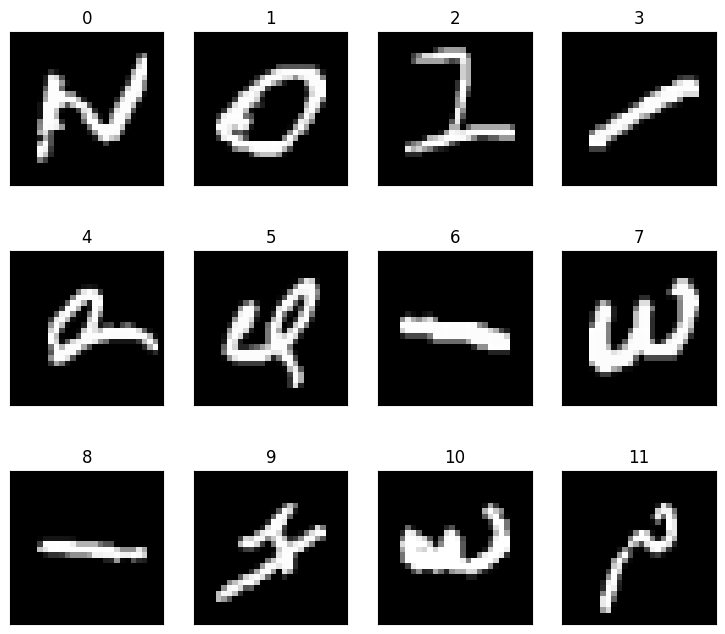

In [17]:
plot_mnist(x_train[:12], [i for i in range(len(x_train[:12]))], h, w)


In [23]:
x_train_ = [np.array(i).flatten() for i in x_train]
x_test_ = [np.array(i).flatten() for i in x_test]
# M = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# print(np.array(x_train[0]).flatten())


In [24]:

clf = tree.DecisionTreeClassifier(
    max_depth=10, random_state=46).fit(x_train_, y_train)


0.8656

In [25]:

clf.score(x_test_, y_test)

0.8656

In [40]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report


y_pred = clf.predict(x_test_)
f1_score(y_test, y_pred, average='weighted')


0.8656522529639248

In [39]:
confusion_matrix(y_test, y_pred)

array([[ 916,    1,    7,    8,    6,   12,    9,    4,   13,    4],
       [   1, 1086,   12,   14,    2,    5,    3,    1,   11,    0],
       [  14,   10,  862,   19,   23,   11,   12,   36,   34,   11],
       [   7,    4,   39,  842,    7,   48,    3,   19,   21,   20],
       [   3,    4,    7,    7,  832,    8,   13,    9,   28,   71],
       [  15,    9,    4,   52,   15,  719,   20,    8,   28,   22],
       [  24,    5,   13,    8,   33,   17,  833,    3,   20,    2],
       [   2,   14,   23,    9,   10,    6,    1,  907,   11,   45],
       [  11,   10,   27,   39,   13,   26,   17,    9,  791,   31],
       [  12,    3,    4,   31,   24,   14,    4,   14,   35,  868]],
      dtype=int64)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.83      0.83      1010
           4       0.86      0.85      0.85       982
           5       0.83      0.81      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000

